In [ ]:
!python -m pip install pystan
!python -m pip install fbprophet

In [ ]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('./samsung3.xlsx')
df

,DATE,거래량,PER,PBR,기관 합계,기타법인,개인,외국인 합계,ATR,NASDAQ,S&P,CBOE,Exchange rate,futures2y,futures10y,y
0,2011-09-01,35870550,7.27,1.24,-83833734000,-8749641000,-177822918000,270406293000,880,2546.0,1204.42,31.82,1064.40,110.28,130.61,15420
1,2011-09-02,12934100,7.26,1.23,-7185878000,2125969000,-11377060000,16436969000,1000,2480.3,1173.97,33.92,1065.60,110.25,131.30,15380
2,2011-09-05,13874400,6.90,1.17,-975699000,-215641000,29370756000,-28179416000,580,2480.3,1173.97,33.92,1065.60,110.25,131.30,14620
3,2011-09-06,13225250,6.86,1.17,2349662000,-1299409000,13839817000,-14890070000,1260,2473.8,1165.24,37.00,1074.65,110.27,131.22,14540
4,2011-09-07,17575200,7.29,1.24,113232351000,1123519000,-77907268000,-36448602000,1300,2548.9,1198.62,33.38,1069.65,110.27,130.89,15460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2456,2021-08-25,22319664,19.71,1.92,-76990474100,-8894667500,82373232300,3511909300,2000,15041.9,4496.19,16.79,1163.87,110.25,133.63,75700
2457,2021-08-26,16671494,19.42,1.89,-55566537800,9344981600,142574757300,-96353201100,1900,14945.8,4469.91,18.84,1170.53,110.25,133.59,74600
2458,2021-08-27,15172748,19.34,1.89,173118394100,10372274300,1510887500,-185001555900,1200,15129.5,4509.37,16.39,1161.23,110.30,133.89,74300
2459,2021-08-30,12686999,19.42,1.89,24586418600,-2401179400,54715193800,-76900433000,2500,15265.9,4528.79,16.19,1164.34,110.32,134.13,74600


In [ ]:
df_copy = df[['DATE', 'y', 'DATE']].copy()

In [ ]:
df_copy.columns = ['ds', 'y', 'DATE']

In [ ]:
df_copy = df_copy.set_index('DATE')

In [ ]:
df_copy

,ds,y
DATE,,
2011-09-01,2011-09-01,15420
2011-09-02,2011-09-02,15380
2011-09-05,2011-09-05,14620
2011-09-06,2011-09-06,14540
2011-09-07,2011-09-07,15460
...,...,...
2021-08-25,2021-08-25,75700
2021-08-26,2021-08-26,74600
2021-08-27,2021-08-27,74300


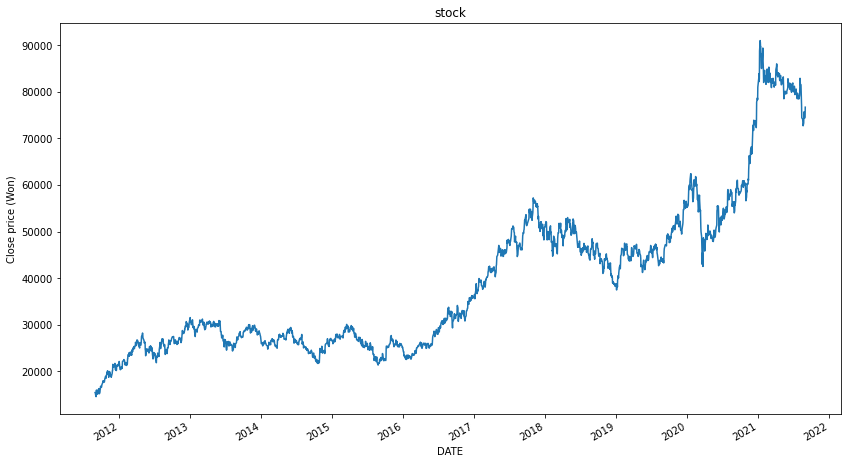

In [ ]:
ax = df_copy['y'].plot(title='stock', figsize=(14,8))
ax.set_ylabel('Close price (Won)')
plt.show()

In [ ]:
df_prophet = Prophet(changepoint_prior_scale=0.15, daily_seasonality=True)
df_prophet.fit(df_copy)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [ ]:
fcast_time = 90   # 1 year: 365
df_forecast = df_prophet.make_future_dataframe(periods = fcast_time, freq = 'D')
df_forecast.tail(10)

,ds
2541,2021-11-20
2542,2021-11-21
2543,2021-11-22
2544,2021-11-23
2545,2021-11-24
2546,2021-11-25
2547,2021-11-26
2548,2021-11-27
2549,2021-11-28
2550,2021-11-29


In [ ]:
df_forecast = df_prophet.predict(df_forecast)

In [ ]:
df_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2546,2021-11-25,89447.068128,85279.765802,93351.362812
2547,2021-11-26,89471.548960,85557.147509,93756.198163
2548,2021-11-27,89359.031903,85212.801998,93667.738516
2549,2021-11-28,89443.655539,85267.154728,93563.941946
2550,2021-11-29,89695.187861,85309.520972,93864.241114


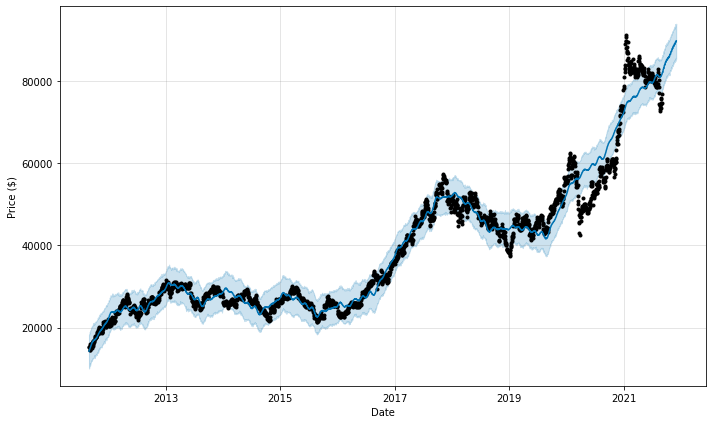

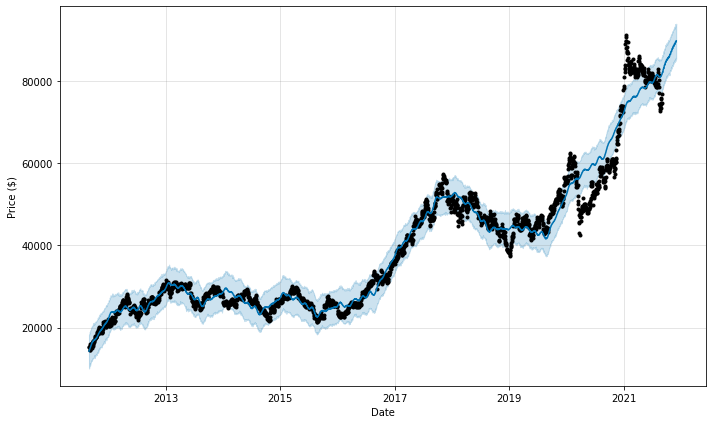

In [ ]:
df_prophet.plot(df_forecast, xlabel = 'Date', ylabel = 'Price ($)')

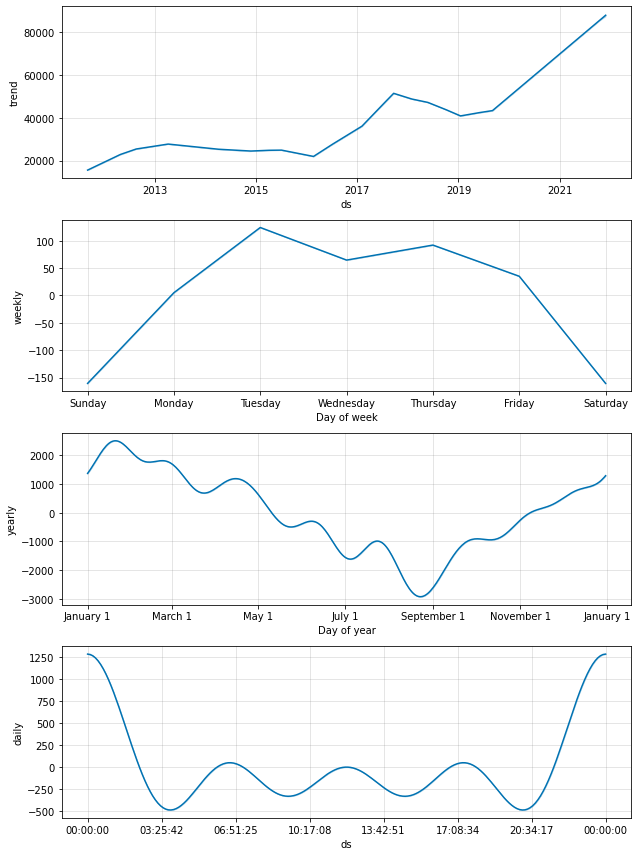

In [ ]:
fig2 = df_prophet.plot_components(df_forecast)
plt.show()

In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(df_prophet, initial='1095 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 13 forecasts with cutoffs between 2014-10-02 00:00:00 and 2020-08-31 00:00:00


  0%|          | 0/13 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2014-10-06,23454.474067,22516.333207,24262.819568,23020,2014-10-02
1,2014-10-07,23463.691722,22577.303490,24289.327294,23240,2014-10-02
2,2014-10-08,23399.400822,22561.218762,24205.204081,22600,2014-10-02
3,2014-10-10,23310.544125,22548.174746,24178.378643,22100,2014-10-02
4,2014-10-13,23192.835715,22396.251793,24023.915949,22160,2014-10-02


In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,38 days,1.730789e+07,4160.275789,3220.846760,0.076701,0.069337,0.270440
1,39 days,1.753824e+07,4187.867718,3249.605333,0.077544,0.070196,0.264151
2,40 days,1.798152e+07,4240.462577,3302.981170,0.078888,0.071231,0.251572
3,41 days,1.875604e+07,4330.824325,3390.905850,0.081008,0.073368,0.237596
4,42 days,1.938838e+07,4403.224088,3455.522595,0.082598,0.074141,0.230608


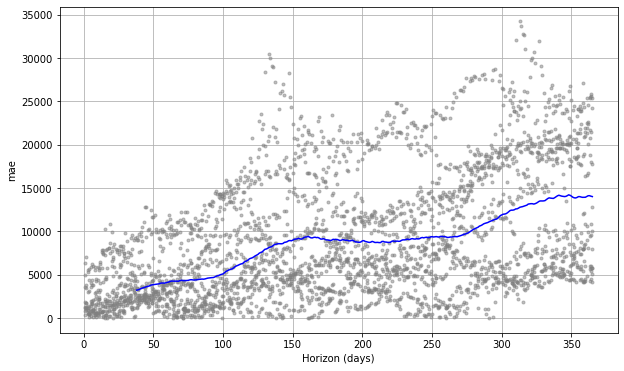

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric = 'mae')